The Hénon–Heiles system is defined as $$\frac{\mathrm{d}^2 x}{\mathrm{d} t^2} = -\frac{\partial V}{\partial x}, \quad \frac{\mathrm{d}^2 y}{\mathrm{d} t^2} = -\frac{\partial V}{\partial y},$$ where $$V(x,y) = \frac{1}{2}(x^2 + y^2) + \left(x^2y - \frac{1}{3}y^3\right).$$ By defining $p = x'$ and $q = y'$, we get the system of four first-order ODEs $$\frac{\mathrm{d} x}{\mathrm{d} t} = p, \quad \frac{\mathrm{d} p}{\mathrm{d} t} = -x - 2xy, \quad \frac{\mathrm{d} y}{\mathrm{d} t} = q, \quad \frac{\mathrm{d} q}{\mathrm{d} t} = -y - (x^2 + y^2).$$ This system can be implemented in Python as follows:

In [1]:
import numpy as np

def f(t, yvec):
    x, p, y, q = yvec[0], yvec[1], yvec[2], yvec[3]
    dx = p
    dp = -x - 2.0*x*y
    dy = q
    dq = -y - (x**2 - y**2)
    return np.array([dx, dp, dy, dq])

We are interested in the solution to the Hénon–Heiles system with initial conditions $$x(0) = 0, \quad p(0) = 0.427001854016272, \quad y(0) = 0.095, \quad q(0) = 0.096$$ on the time interval $[0, 750]$. To do so, we import `classic4`, the classic fourth-order explicit Runge-Kutta method, from `solvers.py`, and then solve the system of ODEs with the specified initial conditions using a step size $h = 0.01$.

In [2]:
import sys
sys.path.append("../src")
from solvers import classic4

x0 = 0.0
p0 = 0.427001854016272
y0 = 0.095
q0 = 0.096
yvec0 = np.array([x0, p0, y0, q0])
t0 = 0.0
tf = 750.0
h = 0.01

t, y = classic4.solve(f, yvec0, t0, tf, h)

Solving ODE...


100%|██████████████████████████████████████████████████████| 75000/75000 [00:01<00:00, 48421.57it/s]

Solution complete! Time elapsed: 0 min 1.553 sec.


We then plot the solution in the $xy$-plane.

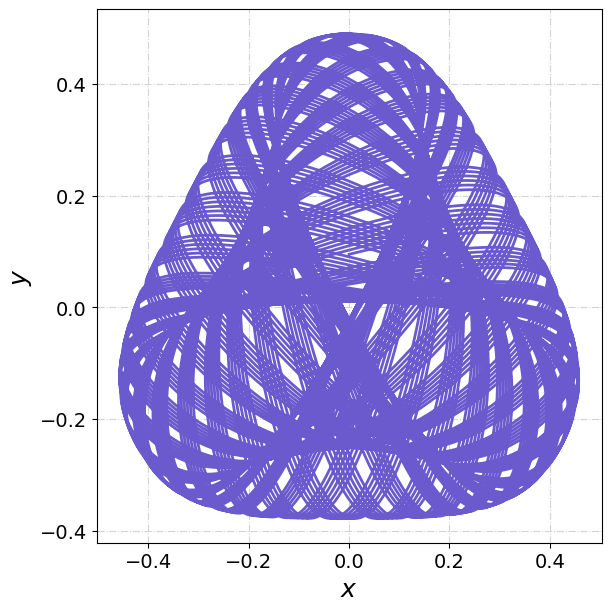

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6), constrained_layout=True)
ax.grid(True, ls="-.", c="lightgrey")
ax.plot(y[:,0], y[:,2], lw=2, c="slateblue")
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.tick_params(axis="both", labelsize=14)
plt.show()